# Recap and overview

This lecture recaps and overviews central concepts and methods from lecture 1-5.

**Note:**

1. I will focus on answering **general questions** repeatingly asked in the survey.
2. If your **more specific questions** are not covered, ask them here: https://github.com/NumEconCopenhagen/lectures-2020/issues.

In [1]:
import itertools as it
import numpy as np
from scipy import optimize

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Lecture 02: Fundamentals

**Abstract:** You will be given an in-depth introduction to the **fundamentals of Python** (objects, variables, operators, classes, methods, functions, conditionals, loops). You learn to discriminate between different **types** such as integers, floats, strings, lists, tuples and dictionaries, and determine whether they are **subscriptable** (slicable) and/or **mutable**. You will learn about **referencing** and **scope**. You will learn a tiny bit about **floating point arithmetics**.

## For vs. while loops

**For loop**: A loop where you know beforehand when it will stop. 

In [2]:
np.random.seed(1917)
Nx = 10
x = np.random.uniform(0,1,size=(Nx,))

In [3]:
for i in range(Nx):
    print(x[i])

0.15451797797720246
0.20789496806883712
0.0027198495778043563
0.1729632542127988
0.855555830200955
0.584099749650399
0.011903025078194518
0.0682582385196221
0.24917894776796679
0.8936630858183269


**While loop**: A loop which continues until some condition is met.

In [4]:
i = 0
while i < Nx:
    print(x[i])
    i += 1

0.15451797797720246
0.20789496806883712
0.0027198495778043563
0.1729632542127988
0.855555830200955
0.584099749650399
0.011903025078194518
0.0682582385196221
0.24917894776796679
0.8936630858183269


**Find first number less than 0.1:**

In [5]:
i = 0
while i < Nx and x[i] >= 0.1:
    i += 1
print(x[i])

0.0027198495778043563


Using a break:

In [6]:
i = 0
while i < Nx:
    i += 1
    if x[i] < 0.1:
        break
print(x[i])

0.0027198495778043563


In [7]:
for i in range(Nx):
    if x[i] < 0.1:
        break
print(x[i])

0.0027198495778043563


**Conclusion:** When you can use a for-loop it typically gives you more simple code.

## Nested loops

In [8]:
Nx = 5
Ny = 5
Nz = 5
x = np.random.uniform(0,1,size=(Nx))
y = np.random.uniform(0,1,size=(Ny))
z = np.random.uniform(0,1,size=(Nz))

In [9]:
mysum = 0
for i in range(Nx):
    for j in range(Ny):
        mysum += x[i]*y[j]
print(mysum)

4.689237201743941


In [10]:
mysum = 0
for i,j in it.product(range(Nx),range(Ny)):
    mysum += x[i]*y[j]
print(mysum)

4.689237201743941


**Meshgrid:**

In [11]:
xmat,ymat = np.meshgrid(x,y,indexing='ij')
mysum = xmat*ymat
print(np.sum(mysum))

4.689237201743942


In [12]:
I,J = np.meshgrid(range(Nx),range(Ny),indexing='ij')
mysum = x[I]*y[J]
print(np.sum(mysum))

4.689237201743942


## Classes

In [13]:
class Fraction:
    
    def __init__(self,numerator,denominator): # called when created
        
        self.num = numerator
        self.denom = denominator
        
    def __str__(self): # called when using print
        
        return f'{self.num}/{self.denom}' # string = self.nom/self.denom
    
    def __add__(self,other): # called when using +
        
        new_num = self.num*other.denom + other.num*self.denom
        new_denom = self.denom*other.denom
        
        return Fraction(new_num,new_denom)  
    
    def reduce(self):
        
        divisor = min(self.num,self.denom)
        
        while divisor >= 2:
            
            if self.num%divisor == 0 and self.denom%divisor == 0:
            
                self.num //= divisor
                self.denom //= divisor
                divisor = min(self.num,self.denom)
            
            else:
                divisor -= 1

In `__add__` we use

$$\frac{a}{b}+\frac{c}{d}=\frac{a \cdot d+c \cdot b}{b \cdot d}$$

In [14]:
x = Fraction(1,3)
print(x)

1/3


In [15]:
x = Fraction(1,3) # 1/3 = 5/15
y = Fraction(3,9) # 2/5 = 6/15
z = x+y # 5/15 + 6/15 = 11/15
print(z)

18/27


In [16]:
z.reduce()
print(z)

2/3


**Check which methods a class have:**

In [17]:
dir(Fraction)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'reduce']

## A consumer class

$$
\begin{aligned}
V(p_{1},p_{2},I) & = \max_{x_{1},x_{2}}x_1^{\alpha}x_2^{1-\alpha}\\
 \text{s.t.}\\
p_{1}x_{1}+p_{2}x_{2} & \leq I,\,\,\,p_{1},p_{2},I>0\\
x_{1},x_{2} & \geq 0
\end{aligned}
$$

**Goal:** Create a model-class to solve this problem.

**Utility function:**

In [18]:
def u_func(model,x1,x2):
    return x1**model.alpha*x2**(1-model.alpha)

**Solution function:**

In [19]:
def solve(model):
        
    # a. objective function (to minimize) 
    obj = lambda x: -model.u_func(x[0],x[1]) # minimize -> negtive of utility
        
    # b. constraints and bounds
    con = lambda x: model.I-model.p1*x[0]-model.p2*x[1] # violated if negative
    constraints = ({'type':'ineq','fun':con})
    bounds = ((0,model.I/model.p1),(0,model.I/model.p2))
        
    # c. call solver
    x0 = [(model.I/model.p1)/2,(model.I/model.p2)/2]
    sol = optimize.minimize(obj,x0,method='SLSQP',bounds=bounds,constraints=constraints)
        
    # d. save
    model.x1 = sol.x[0]
    model.x2 = sol.x[1]
    model.u = model.u_func(model.x1,model.x2)

**Create consumer class:**

In [20]:
class ConsumerClass:
    
    def __init__(self):
        
        self.alpha = 0.5
        self.p1 = 1
        self.p2 = 2
        self.I = 10
            
    u_func = u_func
    solve = solve

**Solve consumer problem**:

In [21]:
jeppe = ConsumerClass()
jeppe.alpha = 0.75
jeppe.solve()
print(f'(x1,x2) = ({jeppe.x1:.3f},{jeppe.x2:.3f}), u = {jeppe.u:.3f}')

(x1,x2) = (7.500,1.250), u = 4.792


Easy to loop over:

In [22]:
for alpha in np.linspace(0.1,0.9,10):
    jeppe.alpha = alpha
    jeppe.solve()
    print(f'alpha = {alpha:.3f} -> (x1,x2) = ({jeppe.x1:.3f},{jeppe.x2:.3f}), u = {jeppe.u:.3f}')

alpha = 0.100 -> (x1,x2) = (1.000,4.500), u = 3.872
alpha = 0.189 -> (x1,x2) = (1.890,4.055), u = 3.510
alpha = 0.278 -> (x1,x2) = (2.778,3.611), u = 3.357
alpha = 0.367 -> (x1,x2) = (3.667,3.167), u = 3.342
alpha = 0.456 -> (x1,x2) = (4.554,2.723), u = 3.442
alpha = 0.544 -> (x1,x2) = (5.446,2.277), u = 3.661
alpha = 0.633 -> (x1,x2) = (6.331,1.834), u = 4.020
alpha = 0.722 -> (x1,x2) = (7.221,1.389), u = 4.569
alpha = 0.811 -> (x1,x2) = (8.111,0.945), u = 5.404
alpha = 0.900 -> (x1,x2) = (9.001,0.499), u = 6.741


# Lecture 03: Optimize, print and plot

**Abstract:** You will learn how to work with numerical data (**numpy**) and solve simple numerical optimization problems (**scipy.optimize**) and report the results both in text (**print**) and in figures (**matplotlib**).

## Numpy

In [23]:
x = np.random.uniform(0,1,size=6)
print(x)

[0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102]


Consider the following code with loop:

In [24]:
y = np.empty(x.size*2)
for i in range(x.size):
    y[i] = x[i]
for i in range(x.size):
    y[x.size + i] = x[i]
print(y)   

[0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102
 0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102]


**Vertical extension of vector** (more columns)

In [25]:
y = np.tile(x,2) # tiling (same x repated)
print(y)

[0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102
 0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102]


In [26]:
y = np.hstack((x,x)) # stacking
print(y)

[0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102
 0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102]


In [27]:
y = np.insert(x,0,x) # insert vector at place 0
print(y)

[0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102
 0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102]


In [28]:
y = np.insert(x,6,x) # insert vector at place 0
print(y)
print(y.shape)

[0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102
 0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102]
(12,)


**Horizontal extension of vector** (more columns)

In [29]:
y = np.vstack((x,x)) # stacking
print(y)
print(y.shape)

[[0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102]
 [0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102]]
(2, 6)


In [30]:
z = y.ravel()
print(z)
print(z.shape)

[0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102
 0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102]
(12,)


In [31]:
y_ = np.tile(x,2) # tiling (same x repated)
print(y_)
print(y_.shape)
print('')
y = np.reshape(y_,(2,6))
print(y)
print(y.shape)

[0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102
 0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102]
(12,)

[[0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102]
 [0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102]]
(2, 6)


In [32]:
y_ = np.repeat(x,2) # repeat each element
print(y_)
print('')
y__ = np.reshape(y_,(6,2))
print(y__)
print('')
y = np.transpose(y__)
print(y)

[0.50162377 0.50162377 0.58786823 0.58786823 0.6692749  0.6692749
 0.67937905 0.67937905 0.87084325 0.87084325 0.30623102 0.30623102]

[[0.50162377 0.50162377]
 [0.58786823 0.58786823]
 [0.6692749  0.6692749 ]
 [0.67937905 0.67937905]
 [0.87084325 0.87084325]
 [0.30623102 0.30623102]]

[[0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102]
 [0.50162377 0.58786823 0.6692749  0.67937905 0.87084325 0.30623102]]


## Numpy vs. dictionary vs. list vs. tuple

In [33]:
x_np = np.zeros(0)
x_list = []
x_dict =  {}
x_tuple = ()

1. If you data is **numeric**, and is changing on the fly, use **numpy**
2. If your data is **heterogenous**, and is changing on the fly, use a **list** or a **dictionary**
3. If your data is **fixed** use a tuple

## Optimizers

All **optimization problems** are characterized by:

1. Control vector (choices), $\boldsymbol{x} \in \mathbb{R}^k$
2. Objective function (payoff) to minimize, $f:\mathbb{R}^k \rightarrow \mathbb{R}$ (differentiable or not)
3. Constraints, i.e. $\boldsymbol{x}  \in C \subseteq \mathbb{R}^k$ (linear or non-linear interdependence)

**Maximization** is just **minimization** of $-f$. 

All **optimizers** (minimizers) have the follow steps:

1. Make initial guess
2. Evaluate the function (and perhaps gradients)
3. Check for convergence
4. Update guess and return to step 2

**Convergence:** "Small" change in function value since last iteration or zero gradient.

**Characteristics** of optimizers:

1. Use gradients or not.
2. Allow for specifying bounds.
3. Allow for specifying general constraints.

**Gradients** provide useful information, but can be costly to compute (using analytical formula or numerically).

## Loops vs. optimizer

**Define function:**

In [34]:
def f(x):
    return np.sin(x)+0.05*x**2

**Solution with loop:**

In [35]:
N = 100
x_vec = np.linspace(-10,10,N)
f_vec = np.empty(N)

f_best = np.inf # initial maximum
x_best = np.nan # not-a-number

for i,x in enumerate(x_vec):
    f_now = f_vec[i] = f(x)
    if f_now < f_best:
        x_best = x
        f_best = f_now

print(f'best with loop is {f_best:.8f} at x = {x_best:.8f}')

best with loop is -0.88366802 at x = -1.51515152


**Solution with scipy optimize:**

In [36]:
x_guess = [0]    
obj = lambda x: f(x[0])
res = optimize.minimize(obj, x_guess, method='Nelder-Mead')
x_best_scipy = res.x[0]
f_best_scipy = res.fun

print(f'best with scipy.optimize is {f_best_scipy:.8f} at x = {x_best_scipy:.8f}')

best with scipy.optimize is -0.88786283 at x = -1.42756250


**Link:** [Scipy on the choice of optimizer](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)

**Comparison:**

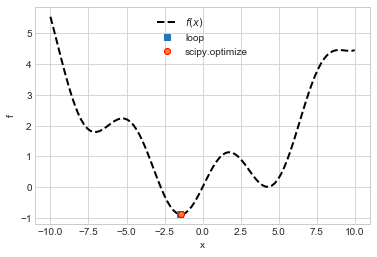

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(x_vec,f_vec,ls='--',lw=2,color='black',label='$f(x)$')
ax.plot(x_best,f_best,ls='',marker='s',label='loop')
ax.plot(x_best_scipy,f_best_scipy,ls='',marker='o',
        markeredgecolor='red',label='scipy.optimize')

ax.set_xlabel('x')
ax.set_ylabel('f')
ax.legend(loc='upper center');

## Gradient descent optimizer

**Algorithm:** `minimize_gradient_descent()`

1. Choose tolerance $\epsilon>0$, step size $\alpha > 0$, and guess on $x_0$, set $n=0$.
2. Compute  $f(x_n)$ and $f^\prime(x_n) \approx \frac{f(\boldsymbol{x}_{n}+\Delta)-f(\boldsymbol{x}_{n})}{\Delta}$.
3. If $|f^\prime(x_n)| < \epsilon$ then stop.
4. Compute new guess "down the hill":

  $$
  \boldsymbol{x}_{n+1} = \boldsymbol{x}_{n} - \alpha f^\prime(x_n)
  $$


5. Set $n = n + 1$ and return to step 2.

**Code for algorithm:**

In [38]:
def gradient_descent(f,x0,alpha=1,Delta=1e-8,max_iter=500,eps=1e-8):
    """ minimize function with gradient descent
        
    Args:

        f (callable): function
        x0 (float): initial value
        alpha (float,optional): step size factor in search
        Delta (float,optional): step size in numerical derivative
        max_iter (int,optional): maximum number of iterations
        eps (float,optional): tolerance
        
    Returns:
    
        x (float): minimum
        fx (float): funciton value at minimum
        trials (list): list with tuple (x,value,derivative)
        
    """
    
    # step 1: initialize
    x = x0
    n = 0
    trials = []
    
    # step 2-4:
    while n < max_iter:
            
        # step 2: compute function value and derivative
        fx = f(x)
        fp = (f(x+Delta)-fx)/Delta
        
        trials.append({'x':x,'fx':fx,'fp':fp}) 
        
        # step 3: check convergence
        print(f'n = {n:3d}: x = {x:12.8f}, f = {fx:12.8f}, fp = {fp:12.8f}')
        if np.abs(fp) < eps:
            break
                  
        # step 4: update x and n
        x -= alpha*fp
        n += 1
        
    return x,fx,trials

**Call the optimizer:**

In [39]:
x0 = 0
alpha = 0.5
x,fx,trials = gradient_descent(f,x0,alpha)
print(f'best with gradient_descent is {fx:.8f} at x = {x:.8f}')

n =   0: x =   0.00000000, f =   0.00000000, fp =   1.00000000
n =   1: x =  -0.50000000, f =  -0.46692554, fp =   0.82758257
n =   2: x =  -0.91379128, f =  -0.75007422, fp =   0.51936899
n =   3: x =  -1.17347578, f =  -0.85324884, fp =   0.26960144
n =   4: x =  -1.30827650, f =  -0.88015974, fp =   0.12868722
n =   5: x =  -1.37262011, f =  -0.88622298, fp =   0.05961955
n =   6: x =  -1.40242989, f =  -0.88751934, fp =   0.02732913
n =   7: x =  -1.41609445, f =  -0.88779134, fp =   0.01247611
n =   8: x =  -1.42233251, f =  -0.88784799, fp =   0.00568579
n =   9: x =  -1.42517540, f =  -0.88785975, fp =   0.00258927
n =  10: x =  -1.42647003, f =  -0.88786219, fp =   0.00117876
n =  11: x =  -1.42705941, f =  -0.88786269, fp =   0.00053655
n =  12: x =  -1.42732769, f =  -0.88786280, fp =   0.00024420
n =  13: x =  -1.42744979, f =  -0.88786282, fp =   0.00011114
n =  14: x =  -1.42750536, f =  -0.88786283, fp =   0.00005058
n =  15: x =  -1.42753065, f =  -0.88786283, fp =   0.0

**Illusstration:**

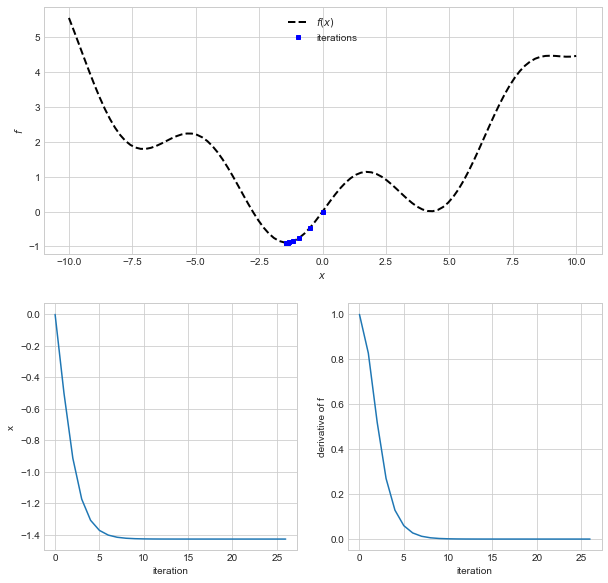

In [40]:
fig = plt.figure(figsize=(10,10))

# a. main figure
ax = fig.add_subplot(2,2,(1,2))

trial_x_vec = [trial['x'] for trial in trials]
trial_f_vec = [trial['fx'] for trial in trials]
trial_fp_vec = [trial['fp'] for trial in trials]

ax.plot(x_vec,f_vec,ls='--',lw=2,color='black',label='$f(x)$')
ax.plot(trial_x_vec,trial_f_vec,ls='',marker='s',ms=4,color='blue',label='iterations')

ax.set_xlabel('$x$')
ax.set_ylabel('$f$')
ax.legend(loc='upper center')

# sub figure 1
ax = fig.add_subplot(2,2,3)
ax.plot(np.arange(len(trials)),trial_x_vec)
ax.set_xlabel('iteration')
ax.set_ylabel('x')

# sub figure 2
ax = fig.add_subplot(2,2,4)
ax.plot(np.arange(len(trials)),trial_fp_vec)
ax.set_xlabel('iteration')
ax.set_ylabel('derivative of f');

# Lecture 04: Random numbers and simulation

**Abstract:** You will learn how to use a random number generator with a seed and produce simulation results (**numpy.random**, **scipy.stats**), and calcuate the expected value of a random variable through Monte Carlo integration. You will learn how to save your results for later use (**pickle**). Finally, you will learn how to make your figures interactive (**ipywidgets**).

**Baseline code:**

In [41]:
def f(x,y):
    return (np.var(x)-np.var(y))**2

In [42]:
np.random.seed(1917)
x = np.random.normal(0,1,size=100)
print(f'mean(x) = {np.mean(x):.3f}')

for sigma in [0.5,1.0,0.5]:
    y = np.random.normal(0,sigma,size=x.size)
    print(f'sigma = {sigma:2f}: f = {f(x,y):.4f}')

mean(x) = -0.007
sigma = 0.500000: f = 0.5522
sigma = 1.000000: f = 0.0001
sigma = 0.500000: f = 0.4985


**Question:** How can we make the loop give the same result for the same value of `sigma`?

**Option 1:** Reset seed

In [43]:
np.random.seed(1917)
x = np.random.normal(0,1,size=100)
print(f'var(x) = {np.var(x):.3f}')

for sigma in [0.5,1.0,0.5]:
    np.random.seed(1918)
    y = np.random.normal(0,sigma,size=x.size)
    print(f'sigma = {sigma:2f}: f = {f(x,y):.4f}')

var(x) = 0.951
sigma = 0.500000: f = 0.4908
sigma = 1.000000: f = 0.0025
sigma = 0.500000: f = 0.4908


**BAD SOLUTION:** Never reset the seed. Variables `x` and `y` are not ensured to be random relative to each other with this method.

**Option 2:** Set and get state

In [44]:
np.random.seed(1917)
x = np.random.normal(0,1,size=100)
print(f'var(x) = {np.var(x):.3f}')

state = np.random.get_state()
for sigma in [0.5,1.0,0.5]:
    np.random.set_state(state)
    y = np.random.normal(0,sigma,size=x.size)
    print(f'sigma = {sigma:2f}: f = {f(x,y):.4f}')

var(x) = 0.951
sigma = 0.500000: f = 0.5522
sigma = 1.000000: f = 0.0143
sigma = 0.500000: f = 0.5522


**Option 3:** Draw once before loop

In [45]:
np.random.seed(1917)
x = np.random.normal(0,1,size=100)
print(f'var(x) = {np.var(x):.3f}')

y_ = np.random.normal(0,1,size=x.size)
for sigma in [0.5,1.0,0.5]:
    y = sigma*y_
    print(f'sigma = {sigma:2f}: f = {f(x,y):.4f}')

var(x) = 0.951
sigma = 0.500000: f = 0.5522
sigma = 1.000000: f = 0.0143
sigma = 0.500000: f = 0.5522


# Lectue 05: Workflow and debugging

**Abstract:** You will learn how to **structure** and **comment** your code and **document** it for later use. You will learn how to **debug** your code using print, **assert** and try/except statements. You will learn how to write **modules** and **run scripts** from a terminal in **VSCode** and how to share your code with others through **Git**.

1. **Jupyterlab vs VSCode:** When to use which?
2. **Python modules:** Make your code more clear
3. **Git:** Clone-commit-sync cycle

# Summary

1. **More questions:** Ask them here https://github.com/NumEconCopenhagen/lectures-2020/issues.
2. **Project 0:** Apply the methods we have talked about so far. Remember, you can revise it later.
2. **Next time:** Pandas, the central Python package for working with data.